# Chapter02.  간단한 분류 알고리즘 훈련

< 학습할 내용 >
* 머신 러닝 알고리즘을 직관적으로 이해
* 판다스, 넘파이, 맷플롯립으로 데이터를 읽고 처리하고 시각화
* 파이썬으로 선형 분류 알고리즘 구현

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.1-인공-뉴런-:-초기-머신-러닝의-간단한-역사" data-toc-modified-id="2.1-인공-뉴런-:-초기-머신-러닝의-간단한-역사-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2.1 인공 뉴런 : 초기 머신 러닝의 간단한 역사</a></span><ul class="toc-item"><li><span><a href="#2.1.1-인공-뉴런의-수학적-정의" data-toc-modified-id="2.1.1-인공-뉴런의-수학적-정의-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2.1.1 인공 뉴런의 수학적 정의</a></span></li><li><span><a href="#2.1.2-퍼셉트론-학습-규칙" data-toc-modified-id="2.1.2-퍼셉트론-학습-규칙-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2.1.2 퍼셉트론 학습 규칙</a></span></li></ul></li><li><span><a href="#2.2-파이썬으로-퍼셉트론-학습-알고리즘-구현" data-toc-modified-id="2.2-파이썬으로-퍼셉트론-학습-알고리즘-구현-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현</a></span><ul class="toc-item"><li><span><a href="#2.2.1-객체-지향-퍼셉트론-API" data-toc-modified-id="2.2.1-객체-지향-퍼셉트론-API-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.2.1 객체 지향 퍼셉트론 API</a></span></li><li><span><a href="#2.2.2-붓꽃-데이터셋에서-퍼셉트론-훈련" data-toc-modified-id="2.2.2-붓꽃-데이터셋에서-퍼셉트론-훈련-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련</a></span></li></ul></li><li><span><a href="#2.3-적응형-선형-뉴런과-학습의-수렴" data-toc-modified-id="2.3-적응형-선형-뉴런과-학습의-수렴-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.3 적응형 선형 뉴런과 학습의 수렴</a></span><ul class="toc-item"><li><span><a href="#2.3.1-경사-하강법으로-비용-함수-최소화" data-toc-modified-id="2.3.1-경사-하강법으로-비용-함수-최소화-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>2.3.1 경사 하강법으로 비용 함수 최소화</a></span></li><li><span><a href="#2.3.2-파이썬으로-아달린-구현" data-toc-modified-id="2.3.2-파이썬으로-아달린-구현-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2.3.2 파이썬으로 아달린 구현</a></span></li><li><span><a href="#2.3.3-특성-스케일을-조정하여-경사-하강법-결과-향상" data-toc-modified-id="2.3.3-특성-스케일을-조정하여-경사-하강법-결과-향상-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상</a></span></li><li><span><a href="#2.3.4-대규모-머신-러닝과-확률적-경사-하강법" data-toc-modified-id="2.3.4-대규모-머신-러닝과-확률적-경사-하강법-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>2.3.4 대규모 머신 러닝과 확률적 경사 하강법</a></span></li></ul></li></ul></div>

## 2.1 인공 뉴런 : 초기 머신 러닝의 간단한 역사

1943년. 워런 맥컬록과 월터 피츠가 간소화된 뇌의 뉴런 개념 발표 (맥컬록-피츠 뉴런)

1957년. 프랑크 로젠블라트가 맥컬록-피츠(MCP) 뉴런 모델 기반의 퍼셉트론 학습 개념 발표

퍼셉트론 규칙에서 자동으로 최적의 가중치를 학습하는 알고리즘 제안. 여기서 가중치는 뉴런의 출력 신호를 낼지 말지 결정하기 위해 입력 특성에 곱하는 계수로, 이 알고리즘을 이용해 샘플이 한 클래스에 속하는지 아닌지를 예측 가능.

### 2.1.1 인공 뉴런의 수학적 정의

인공 뉴런을 두 개의 클래스가 있는 이진 분류 작업으로 볼 수 있다. 

간단하게 두 클래스가 양성(1)과 음성(-1) 클래스라고 한다면 입력 값 x와 이에 상응하는 가중치 벡터 w의 선형 조합으로 결정 함수 정의해 최종 입력 정의.

여기서 특성 샘플의 최종 입력이 사전에 정의된 임계 값보다 크면 클래스 1로, 아니면 -1로 예측. 

### 2.1.2 퍼셉트론 학습 규칙

1. 가중치를 0 또는 랜덤한 작은 값으로 초기화
2. 각 훈련 샘플에서 출력 값을 계산하고 가중치를 업데이트 

만약 퍼셉트론이 클래스 레이블을 정확히 예측한 경우 가중치가 변경되지 않고 그대로 유지. 잘못 예측한 경우 가중치를 양성 혹은 음성 방향으로 이동.

퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작은 경우만 수렴이 보장.

두 클래스를 선형 결정 정계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(에포크, epoch)를 지정해 분류 허용 오차 지정. 지정하지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않는다. 

## 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API

* Perceptron 객체 초기화
* fit 메서드 : 데이터 학습
* predict 메서드 : 예측 생성

In [1]:
import numpy as np

class Perceptron(object):
  """ 퍼셉트론 분류기

  --매개변수--
  eta : 학습률(float, 0.0과 1.0 사이)
  n_iter : 훈련 데이터셋 반복 횟수(int)
  random_state : 가중치 무작위 초기화를 위한 난수 생성기 시드(int)

  --속성--
  w_ : 학습된 가중치(1d_array)
  errors_ : list(에포크마다 누적된 분류 오류)
  
  """

  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ 훈련 데이터 학습

    --매개변수--
    X : [n_samples, n_features] n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : [n_samples] 타깃 값

    --반환값--
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """ 최종 입력 계산 """
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """ 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다 """
    return np.where(self.net_input(X) >= 0.0, 1, -1)

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

붓꽃 데이터셋에서 Setosa와 Versicolor 두 개의 클래스만 사용. 

In [2]:
import pandas as pd

df = pd.read_csv('iris.data',header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**100개의 훈련 샘플에서 첫 번째 특성 열(꽃받침 길이)과 세 번째 특성(꽃잎 길이)을 추출**

In [3]:
import numpy as np

## setosa와 versicolor 선택 ##
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

## 꽃받침 길이와 꽃입 길이 추출 
X = df.iloc[0:100, [0, 2]].values

**추출한 특성들을 특성 행렬 X에 저장 후 2차원 산점도로 시각화**

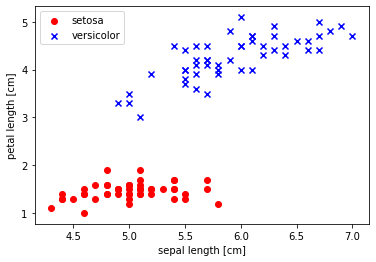

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:50,0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**에포크 대비 잘못 분류된 오차의 그래프**

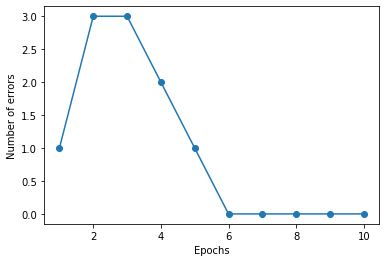

In [6]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

**퍼셉트론이 만든 붓꽃 데이터셋의 결정 경계**

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

  ## 마커와 컬러맵 설정 (s:사각형, x:곱셈기호, o:원, ^:삼각형, v:뒤집힌 삼각형) ##
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])     # ListedColormap을 사용해 colors 리스트에서 컬러맵 생성

  ## 결정 경계 그리기 ##
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1     # 첫 번째 특성의 최솟값과 최댓값
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    # 두 번째 특성의 최솟값과 최댓값
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),   
                         np.arange(x2_min, x2_max, resolution))   # meshgrid : 축에 해당하는 1차원 배열을 전달받아 벡터 공간의 모든 좌표를 담은 행렬 반환
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # ravel : 입력된 배열을 1차원으로 펼치고 펼쳐진 두 개의 배열을 행으로 붙여 하나의 행렬 생성. 그리고 행렬을 전치하여 두 개의 열이 되도록 변경(xy 평면의 좌표)
                                                                  # predict : 그리드 각 포인틑에 대응하는 클래스 레이블 Z 예측
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)     # Z를 XX1, XX2 같은 차원의 그리드로 크기 변경 / contourf : 등고선 그래프 그리는 함수
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  ## 샘플의 산점도 ##
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0],
                y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = cl,
                edgecolor = 'black')      # 그리드 배열에 대해 예측한 클래스를 각각 다른 색깔로 매핑해 결정 영역 나타냄

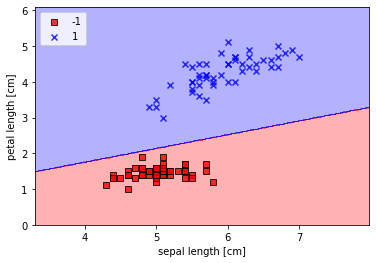

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

퍼셉트론이 학습한 결정 정계는 두 개의 붓꽃으로 구성된 데이터셋의 모든 샘플 완벽하게 분류

## 2.3 적응형 선형 뉴런과 학습의 수렴

**아달린** : 연속 함수로 비용 함수를 정의하고 최소화하는 핵심 개념

아달린 규칙과 퍼셉트론의 가장 큰 차이점 : 가중치를 업데이트하는 데 퍼셉트론처럼 단위 계단 함수 대신 선형 활성화 함수 사용. 즉, 아달린에서 선형 활성화 함수는 최종 입력과 동일한 함수

선형 활성화 함수가 가중치 학습에 사용되지만 최종 예측을 만드는 데 임계 함수를 사용.

*아달린 알고리즘은 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교해 모델의 오차를 계산하고 가중치를 업데이트. 반면에 퍼셉트론은 진짜 클래스 레이블과 예측 클래스 레이블 비교.

### 2.3.1 경사 하강법으로 비용 함수 최소화 

* 목적 함수 : 지도 학습 알고리즘에서 학습 과정 동안 최적화하기 위해 정의. 

* 계산된 출력과 진짜 클래스 레이블 사이의 제곱 오차합으로 가중치를 학습할 비용 함수 정의.

* 경사 하강법 : 비용 함수의 그래디언트 반대 방향으로 조금씩 가중치를 업데이트

* 배치 경사 하강법 : 훈련 세트에 있는 모든 샘플을 기반으로 가중치 업데이트를 계산

### 2.3.2 파이썬으로 아달린 구현

* 퍼셉트론의 fit 메서드를 변경해 경사 하강법으로 비용 함수가 최소화되도록 가중치 업데이트

퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 그래디언트 계산.

In [9]:
class AdalineGD(object):
  """ 적응형 선형 뉴런 분류기 
  
  --매개변수--
  eta : 학습률(0.0과 1.0 사이)
  n_iter : 훈현 데이터셋 반복 횟수
  random_state : 가중치 무작위 초기활르 위한 난수 생성기 시드

  --속성--
  w_ : 학습된 가중치
  cost_ : 에포크마다 누적된 비용 함수의 제곱합

  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):    # 경사 하강법으로 비용 함수가 최소화 되도록 가중치 업데이트
    """ 훈련 데이터 학습

    --매개변수--
    X = [n_samples, n_features] : n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y = [n_samples] : 타깃 값

    --반환값--
    self : object

    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                          size = 1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)   # activation 메서드 : 이 코드에서 단순한 항등 함수이기 때문에 아무런 영향 없음
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)     # X.T.dot(errors) : 특성 행렬과 오차 벡터 간의 행렬-벡터 곱셈
      self.w_[0] += self.eta * errors.sum()     # 절편(0번째 가중치)
      cost = (errors ** 2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """ 최종 입력 계산 """
    return np.dot(X, self.w_[1:] + self.w_[0])

  def activation(self, X):      # 단일층 신경망을 통해 정보가 어떻게 흘러가는지 표시하려고 activation 메서드에서 계산되는 활성화 함수 추가
    """ 선형 활성화 계산 """
    return X

  def predict(self, X):
    """ 단위 계단 함수를 사용해 클래스 레이블 변환 """
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1,-1)

**학습률 0.01과 0.0001에서 에포크 횟수 대비 비용 그래프**

아달린 구현이 훈련 데이터에서 얼마나 잘 학습하는지 확인 가능

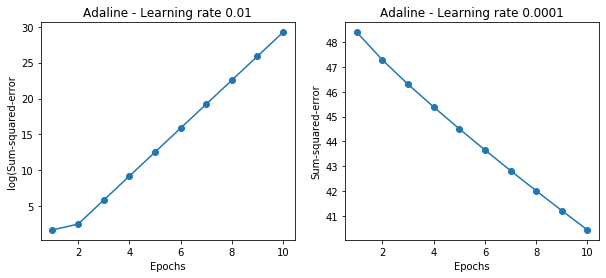

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

왼쪽의 그래프는 전역 최솟값을 지나쳤기 때문에 비용 함수를 최소화하지 못하고 오차는 에포크마다 점점 더 커진다. 

반면에 오른쪽 그래프에서는 비용이 감소하지만 학습률이 너무 작아 알고리즘이 전역 최솟값에 수렴하려면 아주 많은 에포크가 필요함.

### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

* 표준화 : 각 특성의 평균을 0에 맞추고 특성의 표준 편차를 1로 만든다.

표준화 특성 스케일 방법을 이용해 데이터에 표준 정규 분포의 성질을 부여하면 더 적은 단계를 거쳐 최적 혹은 좋은 솔루션을 찾기 때문에 경사 하강법이 조금 더 빠르게 수렴.

**'표준화' 특성 스케일 방법 적용**

In [11]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

**표준화를 적용한 아달린의 결정 경계와 학습 곡선**

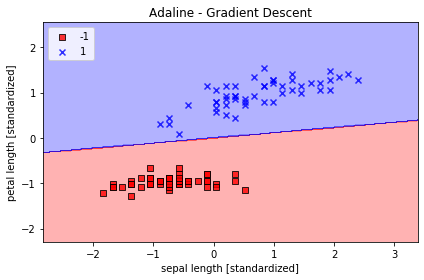

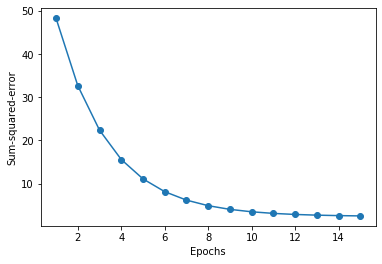

In [12]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

아달린 모델이 수렴. 모든 샘플이 완벽하게 분류되더라도 SSE가 0은 아님

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

배치 경사 하강법을 실행하면 전역 최솟값으로 나아가는 단계마다 매번 전체 훈련 데이터셋을 다시 평가해야 하므로 비용이 많이 든다.

**확률적 경사 하강법**은 모든 샘플에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 두 번째 수식처럼 각 훈련 샘플에 대해 조금씩 가중치를 업데이트. 가중치가 더 자주 업데이트 되어 수렴 속도가 빠르고, 온라인 학습(새로운 훈련 데이터가 도착하는대로 훈련)으로 사용이 가능.

* fit 메서드 : 각 훈련 샘플에 대해 가중치 업데이트
* pertial_fit 메서드 : 가중치를 다시 초기화하지 않아 온라인 학습에서 사용 가능

In [13]:
class AdalineSGD(object):
  """ ADAptive LInear NEuron 분류기

  --매개변수--
  eta : 학습률(0.0과 1.0 사이)
  n_iter : 훈련 데이터셋 반복 횟수
  shuffle : True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞는다.
  random_state : 가중치 무작위 초기화를 위한 난수 생성기 시드

  --속성--
  w_ : 학습된 가중치
  cost_ : 모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

  """

  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):      # 각 훈련 셈플에 대해 가중치를 업데이트
    """ 훈련 데이터 학습

    --매개변수--
    X = [n_samples, n_features] : n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y = [n_samples] : 타깃 벡터

    --반환값--
    self : object

    """

    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self

  def partial_fit(self, X, y):      # 가중치를 다시 초기화하지 않아 온라인 학습에서도 사용 가능
    """ 가중치를 다시 초기화하지 않고 훈련 데이터를 학습 """
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:        
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return sellf

  def _shuffle(self, X, y):   # permutation 함수를 통해 생성된 숫자 시퀀스를 특성 클래스 레이블 벡터를 섞는 인덱스로 사용 - 비용 함수를 최적화 할 때 반복적인 순환이 일어나지 않도록 매 에포크가 일어나기 전에 훈련 샘플을 섞는 옵션 추가
    """ 훈련 데이터를 섞음 """
    r = self.rgen.permutation(len(y))   # permutation 함수 : 0에서 100까지 중복되지 않은 숫자 시퀀스 생성
    return X[r], y[r]
    
  def _initialize_weights(self, m):
    """ 랜덤한 작은 수로 가중치를 초기화 """
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                size = 1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """ 아달린 학습 규칙을 적용해 가중치 업데이트 """
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost
    
  def net_input(self, X):
    """ 최종 입력 계산 """
    return np.dot(X, self.w_[1:]) + self.w_[0]
    
  def activation(self, X):
    """ 선형 활성화 계산 """
    return X

  def predict(self, X):
    """ 단위 계단 함수를 이용해 클래스 레이블 반환 """
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

**확률적 경사 하강법을 사용한 아달린의 결정 경계와 학습 곡선**

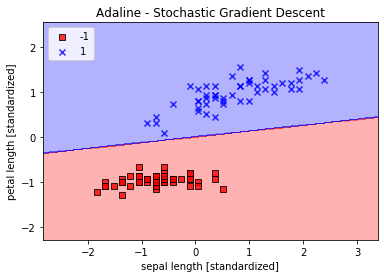

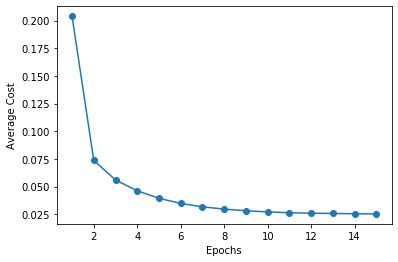

In [14]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)   # AdalineSGD 분류기 훈련

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()